In [3]:
from pathlib import Path
import pandas as pd
import msgpack

In [11]:
DIR = Path("io/2021-02-17/embeddings")
n = 30
n_responses = n * 30

In [12]:
def _get_history_config(f):
    with open(f, "rb") as _f:
        data = msgpack.load(_f)
    return data["meta"], data["history"]

files = DIR.glob(f"*.msgpack")
files = list(files)
print("Number of files:", len(files))
raw = [_get_history_config(f) for f in files]
print("Read files: ", len(raw))

dfs = []
n_ans = {meta["n_responses"] for meta, _ in raw}
print(n_ans)
mrare = [(meta, hist) for meta, hist in raw if meta["n_responses"] == n_responses]
for meta, hist in mrare:
    alg = meta["alg"]
    df = pd.DataFrame(hist)
    df["alg"] = alg
    for k, v in meta.items():
        df[k] = v
    dfs.append(df)
print(f"Trimmed files with n_responses={n_responses}:", len(dfs))
df = pd.concat(dfs)
print(len(df))

Number of files: 544
Read files:  544
{9600, 900, 390, 1800, 2700, 780, 270, 3600, 1680, 4500, 660, 150, 1560, 5400, 540, 1950, 30, 1440, 7200, 420, 9000, 1320, 810, 300, 1200, 690, 180, 2100, 3000, 1080, 570, 60, 3900, 4800, 960, 450, 5700, 840, 6600, 2250, 330, 1740, 8400, 720, 210, 1620, 600, 90, 1500, 120, 2400, 480, 3300, 1380, 870, 4200, 360, 5100, 1260, 750, 6000, 240, 1140, 2550, 630, 7800, 1020, 510}
Trimmed files with n_responses=900: 8
178736


In [13]:
df.iloc[0]

pf_calls                      1
num_answers                 900
model_updates                 2
num_grad_comps             1024
answers_bytes              6000
score_train            0.508889
loss_train             0.693148
k                             0
elapsed_time           0.129043
train_data                  900
n                            30
d                             2
max_epochs               500000
verbose                      20
ident               active-TSTE
_epochs                 1.13778
last_score             0.508889
score_test              0.50815
loss_test              0.693146
_elapsed_time          0.155633
alg                          RR
noise_model                TSTE
responses*R                  10
dataset              alien_eggs
init                       True
max_queries               30100
n_users                      10
noise                     human
random_state                 42
reaction_time              0.25
response_time                 1
est__noi

In [14]:
df["epochs"] = df["num_grad_comps"] / df["num_answers"]

In [15]:
df.columns

Index(['pf_calls', 'num_answers', 'model_updates', 'num_grad_comps',
       'answers_bytes', 'score_train', 'loss_train', 'k', 'elapsed_time',
       'train_data', 'n', 'd', 'max_epochs', 'verbose', 'ident', '_epochs',
       'last_score', 'score_test', 'loss_test', '_elapsed_time', 'alg',
       'noise_model', 'responses*R', 'dataset', 'init', 'max_queries',
       'n_users', 'noise', 'random_state', 'reaction_time', 'response_time',
       'est__noise_model', 'est__shuffle', 'est__max_epochs', 'est__dwell',
       'n_train', 'n_test', 'n_responses', 'epochs'],
      dtype='object')

In [16]:
df["sampling"] = df.ident.apply(lambda x: x.split("-")[0])
df["embedding"] = df.ident.apply(lambda x: x.split("-")[1])
df["epochs/1e6"] = df["epochs"] / 1e6

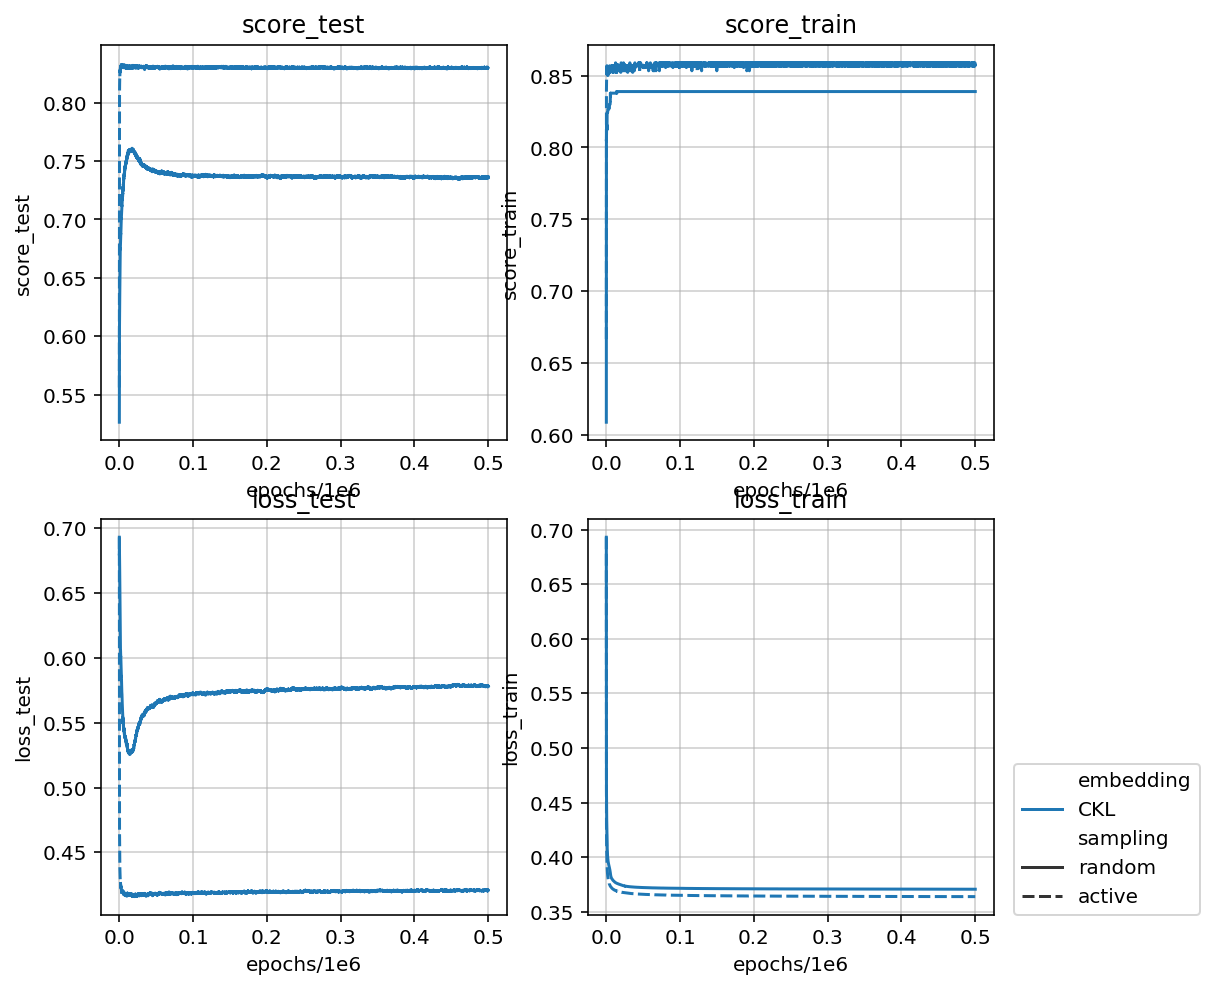

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

w = 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2 * w, 2 * w))
# Y = ["accuracy", "nn_diff_p20", "nn_diff_mean", "nn_acc"]
Y = ["score_test", "score_train", "loss_test", "loss_train"]
hue_order = sorted(list(df.alg.unique()))
for k, (y, ax) in enumerate(zip(Y, axs.flatten())):
    _ = sns.lineplot(
        x="epochs/1e6",
        y=y,
        style="sampling",
        style_order=["random", "active"],
        hue="embedding",
#         hue_order=hue_order,
        data=df[df.embedding == "CKL"],
        ax=ax,
        ci=None,
    )
    _ = ax.grid(alpha=0.6)
    _ = ax.set_title(y)
    if k != 3:
        ax.legend_.remove()
    else:
        ax.legend(loc=(1.05, 0))